In [1]:
import os

In [2]:
import pandas as pd

In [3]:
os.chdir("C://Users//Devyani//Downloads")

In [4]:
df=pd.read_csv("diabetes.csv")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts

In [6]:
x=df.drop(["diabetes"],1)
y=df["diabetes"]
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)

In [7]:
knn=KNeighborsClassifier()
# no of ne

In [8]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.6883116883116883

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv=10)
#cv = 10 is default

array([0.67532468, 0.79220779, 0.71428571, 0.67532468, 0.66233766,
       0.74025974, 0.7012987 , 0.79220779, 0.71052632, 0.75      ])

In [10]:
cross_val_score(knn,x,y,cv=10).mean()

0.7213773069036227

In [11]:
from sklearn.model_selection import GridSearchCV

In [14]:
import numpy as np
params = {"n_neighbors":np.arange(1,10)}
params # its a dict

{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [15]:
knn_cv = GridSearchCV(knn,param_grid=params)

In [16]:
knn_cv.fit(x,y)

C:\Users\Devyani\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [20]:
knn_cv.best_score_

0.7552083333333334

In [38]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [39]:
df1=pd.read_csv("diabetes.csv")
df1.head()
x1=df.drop(["age"],1)
y1=df["age"]

In [42]:
cols=list(x)

TypeError: 'MinMaxScaler' object is not iterable

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()
x=scaler

In [44]:
knn=KNeighborsRegressor()

In [45]:
cross_val_score(knn,x1,y1,cv=10,scoring="r2")

array([ 0.05046948,  0.28897554, -0.04412447,  0.17980882,  0.23726768,
       -0.19568135,  0.24401352,  0.05096898,  0.23862212, -0.1399155 ])

In [48]:
pd.concat([x1,y1],1)
df_1=df1.copy()
df=df1.drop(["diabetes"],1)

In [49]:
import seaborn as sb

In [50]:
df.corr()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


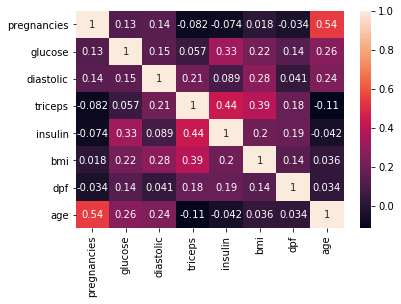

In [51]:
sb.heatmap(df.corr(),annot=True)